## Project Goal
To create a regression model for predicting housing prices (column 'median_house_value').

## Import Libraries

In [83]:
## for loading data and preprocessing 
import numpy as np
import pandas as pd

## for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## for splitting dataset
from sklearn.model_selection import train_test_split

## for normalizing the features of our dataset
from sklearn.preprocessing import StandardScaler

## 
from sklearn.pipeline import make_pipeline

## algorithm for training model
from sklearn.linear_model import LinearRegression

## computing accuracy
from sklearn.metrics import median_absolute_error, accuracy_score, mean_squared_error

## Downloading And Loading Dataset

In [84]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [85]:
df = pd.read_csv('housing.csv')

Lets view first 5 rows

In [86]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Lets view the last 5 rows

In [87]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Lets create a copy of the dataset

In [88]:
data = df.copy()

## Permforming Exploratory Data Analysis

### Let's Perform Our Target Variable Analysis 

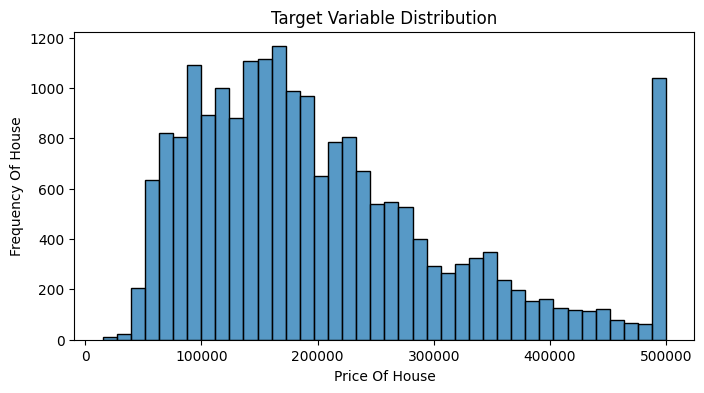

In [89]:
plt.figure(figsize=(8,4))
plt.title('Target Variable Distribution')
plt.xlabel('Price Of House')
plt.ylabel('Frequency Of House')

sns.histplot(df.median_house_value, bins=40)

plt.show()

### Lets Apply Log Transformation To Normalize The Distribution

In [90]:
log_price = np.log1p(df.median_house_value)

#### Lets Plot The Normalized Distribution

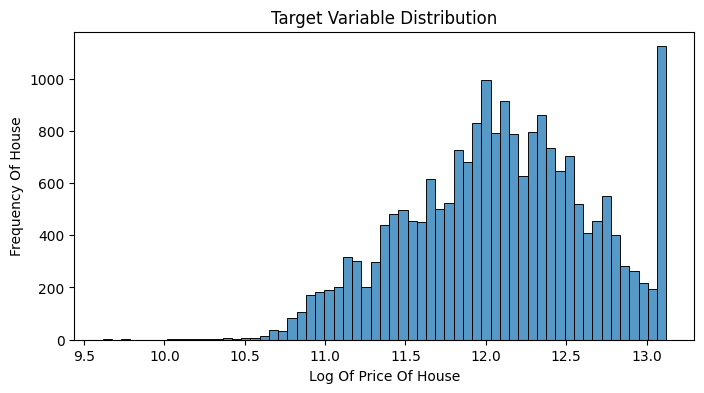

In [91]:
plt.figure(figsize=(8,4))
plt.title('Target Variable Distribution')
plt.xlabel('Log Of Price Of House')
plt.ylabel('Frequency Of House')

sns.histplot(log_price)

plt.show()

For the rest of the homework, you'll need to use only these columns:

    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'


Lets select our new dataframe 

In [92]:
select_new_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']

In [93]:
df_new = df[select_new_features]
df_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


Question 1 

Find a feature with missing values. How many missing values does it have?
- 207
- 307
- 408
- 508

The feature with missing value of 207 is 'total_bedrooms'

In [94]:
## lets compute the number of missing values in our dataframe
df_new.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Question 2

What's the median (50% percentile) for variable 'population'?
- 1133
- 1122
- 1166
- 1188


In [95]:
## lets compute a summary statistics on the dataset
df_new.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Building A Validation Framework
- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('median_house_value') is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [96]:
df_train_full, df_test = train_test_split(df_new, test_size=0.2, random_state=42)
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=42)


print(f"Size of training dataset: {len(df_train)}")
print(f"Size of validation dataset: {len(df_valid)}")
print(f"Size of testing dataset: {len(df_test)}")

Size of training dataset: 12384
Size of validation dataset: 4128
Size of testing dataset: 4128


Lets Select Our Target Variable and apply log transformation to it

In [97]:
y_train = np.log1p(df_train['median_house_value'])
y_valid = np.log1p(df_valid['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

In [98]:
del df_train['median_house_value']
del df_valid['median_house_value']
del df_test['median_house_value']

### Filling The Missing Values

## finding the missing values with zeros

df_train = df_tra

In [99]:
df_train_0 = df_train.fillna(0)
df_valid_0 = df_valid.fillna(0)
df_test_0 = df_test.fillna(0)


In [100]:
X_train_zeros = df_train_0.values
X_valid_zeros = df_valid_0.values
X_test_zeros = df_test_0.values

In [101]:
df_train_0.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [102]:
df_train_mean = df_train.fillna(df_train.total_bedrooms.mean())
df_valid_mean = df_valid.fillna(df_valid.total_bedrooms.mean())
df_test_mean = df_test.fillna(df_test.total_bedrooms.mean())

In [103]:
df_train_mean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [104]:
X_train_mean = df_train_mean.values
X_valid_mean = df_valid_mean.values
X_test_mean = df_test_mean.values

## Training Model 

In [105]:
lin_reg_zeros = LinearRegression()
lin_reg_zeros.fit(X_train_zeros, y_train)

LinearRegression()

In [106]:
lin_reg_mean = LinearRegression()
lin_reg_mean.fit(X_train_mean, y_train)

LinearRegression()

In [107]:
y_train_pred_zeros = lin_reg_zeros.predict(X_train_zeros)

## Evaluate the Performance Of The Model

In [108]:
y_valid_pred_zeros = lin_reg_zeros.predict(X_valid_zeros)
y_valid_pred_mean = lin_reg_mean.predict(X_valid_mean)

In [109]:
mse = mean_squared_error(y_valid_pred_zeros, y_valid)
rmse_zeros = np.sqrt(mse)
print(f"Validation Accuracy: {round(rmse_zeros, 2)}")

Validation Accuracy: 0.34


In [110]:
mse = mean_squared_error(y_valid_pred_mean, y_valid)
rmse_mean = np.sqrt(mse)
print(f"Validation Accuracy: {round(rmse_mean, 2)}")

Validation Accuracy: 0.34
